In [1]:
#Install gdown library 
!pip install gdown


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#Download file in Jupyter notebook
import gdown

file_id = "1Ck__0Xxj5kQKQVSg4li0yi61pMr3O2S_"
url = f"https://drive.google.com/uc?id={file_id}"

output = 'churn_clean_pres.csv'  # Specify your desired output file name
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Ck__0Xxj5kQKQVSg4li0yi61pMr3O2S_
To: /Users/jasminemoniquecooper/churn_clean_pres.csv
100%|██████████████████████████████████████| 3.57M/3.57M [00:00<00:00, 18.7MB/s]


'churn_clean_pres.csv'

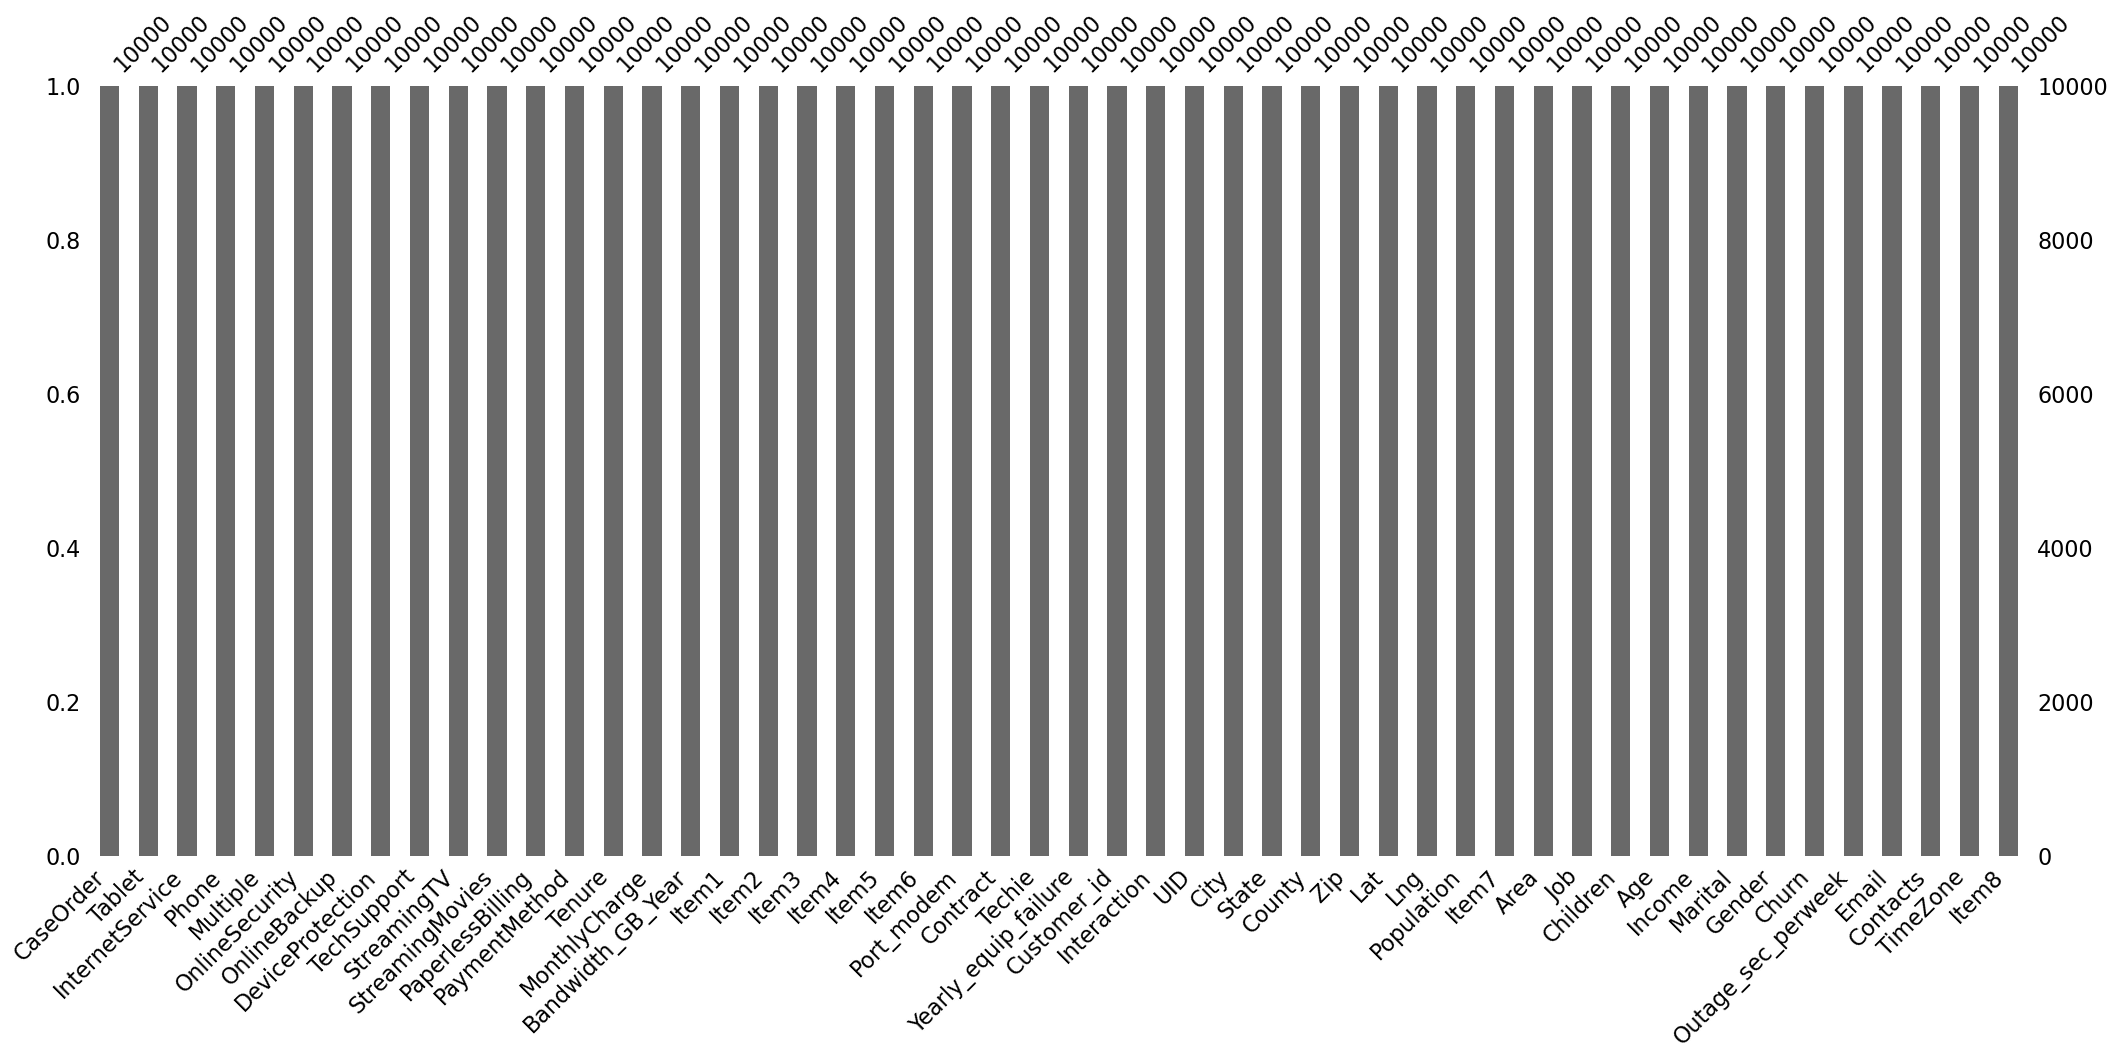

In [3]:
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
churn_clean_data = pd.read_csv (output)
pd.set_option('display.max_columns', None)
churn_clean_data.head(10)

#ensure no missing data
column_order = churn_clean_data.isnull().sum().sort_values().index
msno.bar(churn_clean_data[column_order])
plt.show()

In [4]:
#reducing the dataset to only include continuous variables 

selected_columns = ['Population','Income', 'Email', 'Tenure', 'Children', 'Age', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge','Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

churn_clean_PCA = churn_clean_data[selected_columns]

print(churn_clean_PCA)

      Population    Income  Email     Tenure  Children  Age  \
0             38  28561.99     10   6.795513         0   68   
1          10446  21704.77     12   1.156681         1   27   
2           3735   9609.57      9  15.754144         4   50   
3          13863  18925.23     15  17.087227         1   48   
4          11352  40074.19     16   1.670972         0   83   
...          ...       ...    ...        ...       ...  ...   
9995         640  55723.74     12  68.197130         3   23   
9996       77168  34129.34     15  61.040370         4   48   
9997         406  45983.43     10  47.416890         1   48   
9998       35575  16667.58     14  71.095600         1   39   
9999       12230   9020.92     17  63.350860         1   28   

      Outage_sec_perweek  Contacts  Yearly_equip_failure  MonthlyCharge  \
0               7.978323         0                     1     172.455519   
1              11.699080         0                     1     242.632554   
2              10.

In [21]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaled_churn_PCA_data = scaler.fit_transform(churn_clean_PCA)

scaled_churn_PCA_df = pd.DataFrame(scaled_churn_PCA_data, columns=churn_clean_PCA.columns)

print(scaled_churn_PCA_df)

      Population    Income     Email    Tenure  Children       Age  \
0      -0.673405 -0.398778 -0.666282 -1.048746 -0.972338  0.720925   
1       0.047772 -0.641954 -0.005288 -1.262001 -0.506592 -1.259957   
2      -0.417238 -1.070885 -0.996779 -0.709940  0.890646 -0.148730   
3       0.284537 -0.740525  0.986203 -0.659524 -0.506592 -0.245359   
4       0.110549  0.009478  1.316700 -1.242551 -0.972338  1.445638   
...          ...       ...       ...       ...       ...       ...   
9995   -0.631692  0.564456 -0.005288  1.273401  0.424900 -1.453214   
9996    4.670977 -0.201344  0.986203  1.002740  0.890646 -0.245359   
9997   -0.647906  0.219037 -0.666282  0.487513 -0.506592 -0.245359   
9998    1.788974 -0.820588  0.655706  1.383018 -0.506592 -0.680187   
9999    0.171386 -1.091760  1.647197  1.090120 -0.506592 -1.211643   

      Outage_sec_perweek  Contacts  Yearly_equip_failure  MonthlyCharge  \
0              -0.679978 -1.005852              0.946658      -0.003943   
1        

In [22]:
#determine matrix of all principal components 

from sklearn.decomposition import PCA 
pca = PCA()
pca_transformed = pca.fit_transform(scaled_churn_PCA_data)

factor_loadings = pca.components_

factor_loadings_df = pd.DataFrame(factor_loadings, 
                                  columns=[f'PC{i+1}' for i in range(len(pca.components_))], 
                                  index=churn_clean_PCA.columns)

print(factor_loadings_df)

                           PC1       PC2       PC3       PC4       PC5  \
Population           -0.002109  0.001038  0.008744 -0.016320  0.004072   
Income               -0.005463  0.006035 -0.020609  0.702323  0.015862   
Email                 0.014732  0.025865 -0.003459 -0.063085  0.028393   
Tenure               -0.292151  0.252065 -0.190450 -0.005355  0.510569   
Children              0.264958 -0.285030  0.519450 -0.007568  0.345310   
Age                   0.402355 -0.084983  0.319498  0.048576 -0.089376   
Outage_sec_perweek    0.355864 -0.429611 -0.103117  0.000016  0.119069   
Contacts              0.329128  0.581477  0.170129  0.007554  0.226847   
Yearly_equip_failure  0.161654  0.449649  0.290785 -0.028780  0.155912   
MonthlyCharge         0.580378  0.219833 -0.592268 -0.001590 -0.175953   
Bandwidth_GB_Year     0.167295 -0.252659 -0.328652 -0.028600  0.655599   
Item1                 0.229022 -0.057674  0.061145 -0.027147 -0.241974   
Item2                -0.057130 -0.0204

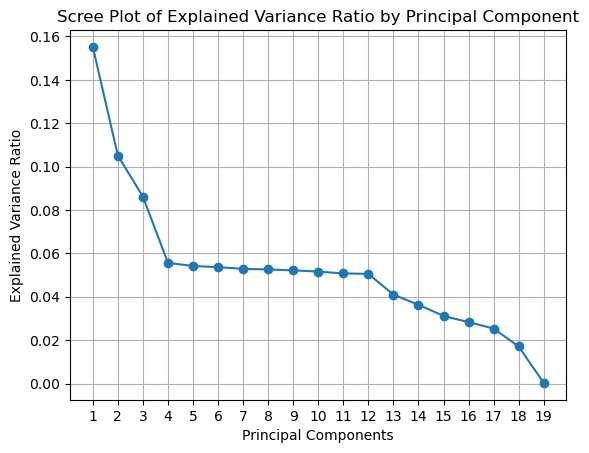

In [23]:
#determine the total number of components using the elbow rule 
#make scree plot 

import matplotlib.pyplot as plt
import numpy as np

# Determine the total number of components using the elbow rule
# Make scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of Explained Variance Ratio by Principal Component')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


In [24]:
import pandas as pd

# Get the variance explained by each of the retained principal components
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display the variance explained by each principal component
num_components = min(len(explained_variance), 4)  # Ensure that the number of components matches the length of ['PC1', 'PC2', 'PC3', 'PC4']
explained_variance_df = pd.DataFrame({'Principal Component': [f'PC{i+1}' for i in range(num_components)], 
                                      'Explained Variance': explained_variance[:num_components]})

# Print the DataFrame
print(explained_variance_df)

  Principal Component  Explained Variance
0                 PC1            0.155188
1                 PC2            0.105101
2                 PC3            0.086134
3                 PC4            0.055627


In [25]:
# Total variance captured by the principal components retained
import numpy as np

# Variances explained by the retained principal components
variances = [0.155188, 0.105101, 0.086134, 0.055627 ]

# Calculate the total variance captured
total_variance_captured = np.sum(variances)

print("Total Variance Captured by Principal Components:", total_variance_captured)

Total Variance Captured by Principal Components: 0.40204999999999996


In [26]:
# Capture the explained variance ratio
total_variance = sum(pca.explained_variance_)

print("Total Variance Explained:", total_variance)

Total Variance Explained: 19.001900190018993


In [15]:
import pandas as pd

scaled_churn_PCA_data_df = pd.DataFrame(scaled_churn_PCA_data, columns=churn_clean_PCA.columns)

# Save the DataFrame to a CSV file
scaled_churn_PCA_data_df.to_csv('/Users/jasminemoniquecooper/Downloads/scaled_churn_PCA_data_new.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!
